In [48]:
import requests 
import json
import time
from time import sleep
import pandas as pd
from bs4 import BeautifulSoup
import csv
import jieba
import jieba.analyse
import numpy as np
from collections import Counter

In [30]:
# 執行目標:透過網路爬蟲分析紅樓夢前80回及後40回作者用字習慣，嘗試辨識是否為同一人

# 書籍網址：https://ctext.org/hongloumeng/zh
# 目標：紅樓夢

## 索引章節標題

# 透過resquests取得網頁資料轉換成json格式

url = 'https://ctext.org/hongloumeng/zh'
response = requests.get(url)
html_content = response.text

soup = BeautifulSoup(html_content, 'html.parser')
content = soup.find(id='content2')

# 排除id為"rhsbar"的部分
rhsbar = content.find(id='rhsbar')
rhsbar.extract()

# 排除表格數據
tables = content.find_all('table')
for table in tables:
    table.extract()

# 排除class為"urnlabel etext"的部分
urnlabels = content.find_all(class_='urnlabel etext')
for urnlabel in urnlabels:
    urnlabel.extract()

catalog = content.find_all('a', href=True)

for item in catalog:
    chapter = item.text
    href = item['href']
    link = "https://ctext.org/" + href
    print(f"Chapter: {chapter}")
    print(f"Href: {href}")
    print(f"link: {link}")
    print()

Chapter: 甄士隱夢幻識通靈　賈雨村風塵懷閨秀
Href: hongloumeng/ch1/zh
link: https://ctext.org/hongloumeng/ch1/zh

Chapter: 賈夫人仙逝揚州城　冷子興演說榮國府
Href: hongloumeng/ch2/zh
link: https://ctext.org/hongloumeng/ch2/zh

Chapter: 託內兄如海薦西賓　接外孫賈母惜孤女
Href: hongloumeng/ch3/zh
link: https://ctext.org/hongloumeng/ch3/zh

Chapter: 薄命女偏逢薄命郎　葫蘆僧判斷葫蘆案
Href: hongloumeng/ch4/zh
link: https://ctext.org/hongloumeng/ch4/zh

Chapter: 賈寶玉神遊太虛境　警幻仙曲演紅樓夢
Href: hongloumeng/ch5/zh
link: https://ctext.org/hongloumeng/ch5/zh

Chapter: 賈寶玉初試雲雨情　劉姥姥一進榮國府
Href: hongloumeng/ch6/zh
link: https://ctext.org/hongloumeng/ch6/zh

Chapter: 送宮花賈璉戲熙鳳　宴寧府寶玉會秦鐘
Href: hongloumeng/ch7/zh
link: https://ctext.org/hongloumeng/ch7/zh

Chapter: 賈寶玉奇緣識金鎖　薛寶釵巧合認通靈
Href: hongloumeng/ch8/zh
link: https://ctext.org/hongloumeng/ch8/zh

Chapter: 訓劣子李貴承申飭　嗔頑童茗煙鬧書房
Href: hongloumeng/ch9/zh
link: https://ctext.org/hongloumeng/ch9/zh

Chapter: 金寡婦貪利權受辱　張太醫論病細窮源
Href: hongloumeng/ch10/zh
link: https://ctext.org/hongloumeng/ch10/zh

Chapter: 慶壽辰寧府排家宴　見熙鳳賈瑞起淫心
Href: hongl

In [46]:
## 索引章節內容
#建立資料庫並轉存成json檔/csv檔

data = []

for item in catalog:
    chapter = item.text
    href = item['href']
    link = f"https://ctext.org/{href}"

    response = requests.get(link)
    chapter_content = response.text

    chapter_soup = BeautifulSoup(chapter_content, 'html.parser')
    chapter_text = chapter_soup.find_all('td', class_='ctext')

    content_list = []
    for td in chapter_text:
        if not td.find(class_='opt') and 'style' not in td.attrs:
            content = td.get_text(separator=' ')
            content_list.append(content)

    chapter_data = {
        'chapter': chapter,
        'link': link,
        'content': content_list
    }

    data.append(chapter_data)

# 存成JSON檔
with open('hongloumeng.json', 'w', encoding='utf-8') as json_file:
    json.dump(data, json_file, ensure_ascii=False, indent=4)

# 存成csv檔
csv_data = []
for chapter_data in data:
    chapter = chapter_data['chapter']
    link = chapter_data['link']
    content = ' '.join(chapter_data['content'])

    csv_data.append([chapter, link, content])

csv_columns = ['Chapter', 'Link', 'Content']

with open('hongloumeng.csv', 'w', encoding='utf-8', newline='') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(csv_columns)
    writer.writerows(csv_data)

In [50]:
data = pd.read_csv('hongloumeng.csv')
data.head()

,Chapter,Link,Content
0,甄士隱夢幻識通靈 賈雨村風塵懷閨秀,https://ctext.org/hongloumeng/ch1/zh,\n 此開卷第一回也。作者自云曾歷過一番夢幻之後，故將真事隱去，而借「通靈」說此《石頭記》一...
1,賈夫人仙逝揚州城 冷子興演說榮國府,https://ctext.org/hongloumeng/ch2/zh,\n 卻說封肅聽見公差傳喚，忙出來陪笑啟問。那些人只嚷：「快請出甄爺來！」封肅忙陪笑道：「小...
2,託內兄如海薦西賓 接外孫賈母惜孤女,https://ctext.org/hongloumeng/ch3/zh,\n 卻說雨村忙回頭看時，不是別人，乃是當日同僚一案參革的張如圭。他係此地人，革後家居。今打...
3,薄命女偏逢薄命郎 葫蘆僧判斷葫蘆案,https://ctext.org/hongloumeng/ch4/zh,\n 卻說黛玉同姐妹們至王夫人處，見王夫人正和兄嫂處的來使計議家務，又說姨母家遭人命官司等語...
4,賈寶玉神遊太虛境 警幻仙曲演紅樓夢,https://ctext.org/hongloumeng/ch5/zh,\n 第四回中既將薛家母子在榮府中寄居等事略已表明，此回暫可不寫了。如今且說林黛玉自在榮府以...


In [53]:
documents = ['我叫鄭宇皓，正在進行測試']#一段字串
# 精確模式
for sentence in documents:
    seg_list = jieba.cut(sentence)#用jieba做cut斷詞
    print('/'.join(seg_list))#印出來的內容用斜線隔開

我/叫/鄭宇皓/，/正在/進行/測試


In [55]:
jieba.load_userdict('./userdict.txt')#自己建立斷詞文本

for sentence in documents:
    seg_list = jieba.cut(sentence)
    print('/'.join(seg_list))

我/叫/鄭宇皓/，/正在/進行/測試


In [57]:
#新增一個新欄位
data['seg'] = ""
data.head()

,Chapter,Link,Content,seg
0,甄士隱夢幻識通靈 賈雨村風塵懷閨秀,https://ctext.org/hongloumeng/ch1/zh,\n 此開卷第一回也。作者自云曾歷過一番夢幻之後，故將真事隱去，而借「通靈」說此《石頭記》一...,
1,賈夫人仙逝揚州城 冷子興演說榮國府,https://ctext.org/hongloumeng/ch2/zh,\n 卻說封肅聽見公差傳喚，忙出來陪笑啟問。那些人只嚷：「快請出甄爺來！」封肅忙陪笑道：「小...,
2,託內兄如海薦西賓 接外孫賈母惜孤女,https://ctext.org/hongloumeng/ch3/zh,\n 卻說雨村忙回頭看時，不是別人，乃是當日同僚一案參革的張如圭。他係此地人，革後家居。今打...,
3,薄命女偏逢薄命郎 葫蘆僧判斷葫蘆案,https://ctext.org/hongloumeng/ch4/zh,\n 卻說黛玉同姐妹們至王夫人處，見王夫人正和兄嫂處的來使計議家務，又說姨母家遭人命官司等語...,
4,賈寶玉神遊太虛境 警幻仙曲演紅樓夢,https://ctext.org/hongloumeng/ch5/zh,\n 第四回中既將薛家母子在榮府中寄居等事略已表明，此回暫可不寫了。如今且說林黛玉自在榮府以...,


In [60]:
jieba.analyse.set_stop_words('stopwords.txt') 
index = 0
for documents in data['Content']:
    seg_list = jieba.analyse.extract_tags(str(documents), 150) #前150個權重最高的單詞
    data['seg'].iloc[index] = seg_list #存入seg_list
    index += 1

In [61]:
data['seg']

0      [士隱, 雨村, 道人, 丫鬟, 石頭, 那僧, 石頭記, 幾個, 原來, 風流, 封肅, ...
1      [雨村, 一個, 兩個, 子興道, 女兒, 封肅, 子興, 這樣, 兒子, 原來, 如海, ...
2      [賈母, 黛玉, 寶玉, 一個, 王夫人, 兩個, 妹妹, 丫鬟, 雨村, 只見, 黛玉道,...
3      [雨村, 老爺, 門子, 拐子, 薛蟠, 王夫人, 薛公子, 馮淵, 薛家, 原來, 幾個,...
4      [寶玉, 一個, 仙姑, 警幻, 秦氏, 這裡, 警幻道, 那裡, 只見, 畫著, 不知, ...
                             ...                        
115    [寶玉, 怎麼, 和尚, 只見, 一個, 鴛鴦, 心裡, 那裡, 老爺, 出來, 這裡, 什...
116    [什麼, 王夫人, 寶玉, 那裡, 一個, 襲人, 太太, 寶釵, 兩個, 我們, 賈璉, ...
117    [寶玉, 王夫人, 寶釵, 太太, 什麼, 二爺, 過來, 這個, 賈蘭, 我們, 姑娘, ...
118    [王夫人, 平兒, 回來, 太太, 那裡, 劉老, 寶玉, 這樣, 邢夫人, 眾人, 我們,...
119    [寶玉, 襲人, 寶釵, 薛姨媽, 雨村, 賈政, 一個, 這樣, 王夫人, 老爺, 眾人,...
Name: seg, Length: 120, dtype: object

In [67]:
#將資料拆分成前80章及後40章

data_seg_80list = data['seg'][:80].tolist()
data_seg_40list = data['seg'][80:].tolist()
type(data_seg_80list)
type(data_seg_40list)

list

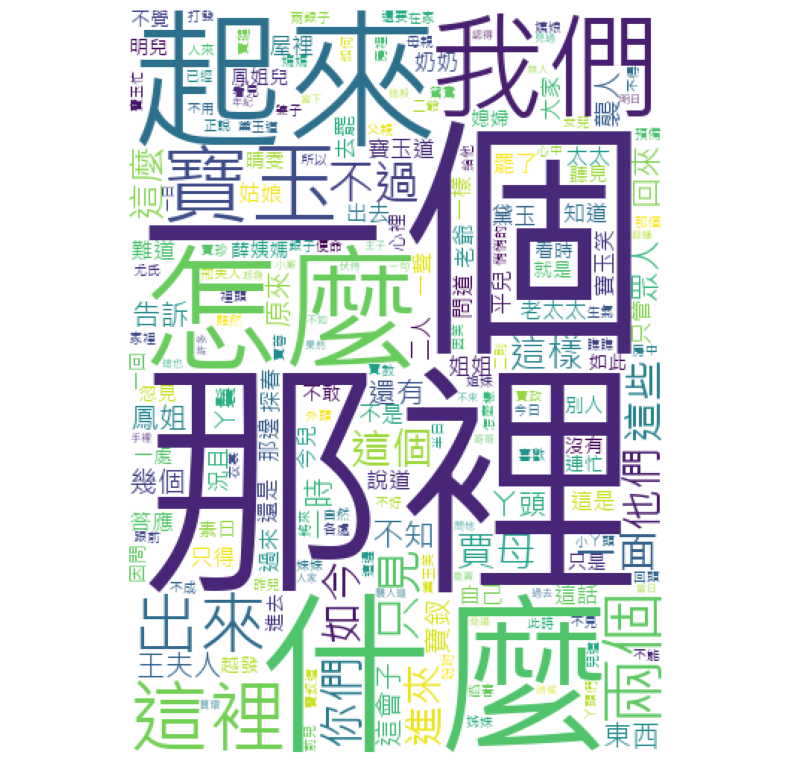

In [65]:
flat = [x for datalist in data_seg_80list for x in datalist]
diction = Counter(flat)

from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

mask = np.array(Image.open("red.jpg"))
font = r"C:\Windows\Fonts\msjh.ttc"

wordcloud = WordCloud(background_color = "white", font_path=font, mask = mask)
wordcloud.generate_from_frequencies(diction)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

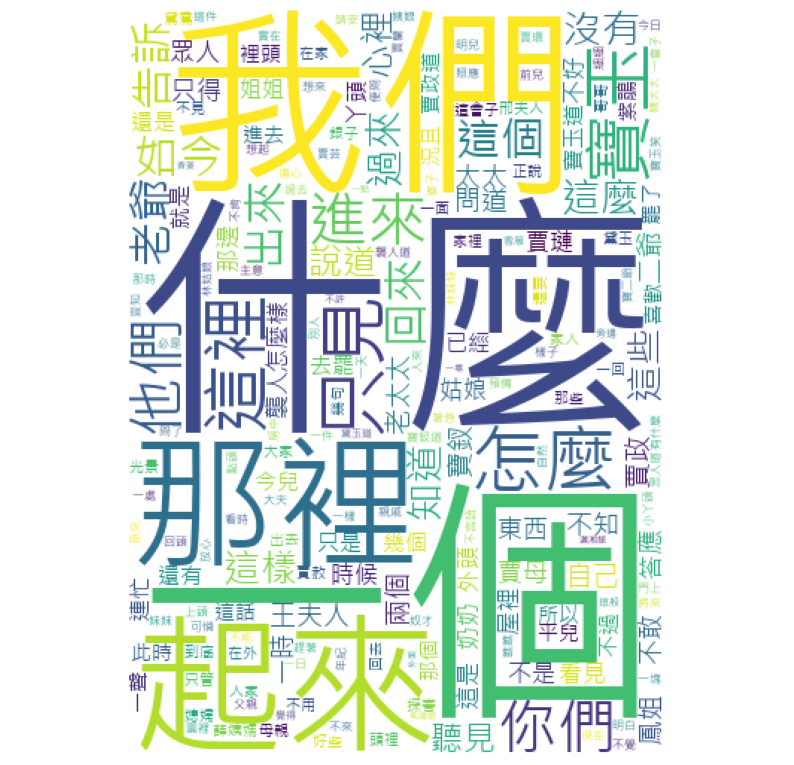

In [68]:
flat = [x for datalist in data_seg_40list for x in datalist]
diction = Counter(flat)

from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

mask = np.array(Image.open("red.jpg"))
font = r"C:\Windows\Fonts\msjh.ttc"

wordcloud = WordCloud(background_color = "white", font_path=font, mask = mask)
wordcloud.generate_from_frequencies(diction)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
# 結論:
# 這次會選擇這個題目是因為過去曾看到這樣的嘗試
# 在文學界中層有對紅樓夢作者的爭議，後40章為後人續寫
# 近代有研究者透過AI工具進行文本分析嘗試解惑
# 這次我同樣也進行了類似的嘗試，著重於用字習慣的部分
# 但發現因為自己相關知識的欠缺無而無法進行有效分析，最終只能呈現出如此結果